#### Assignment 1: ML Data Cleaning and Feature Selection
ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important

Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?

For categorical data, calculate the accuracy and a confusion matrix.

Imputation Methods for Missing Data
Watch this video for more information on imputation methods: Imputation Methods for Missing Data

Nice EDA Notebook
Check out this comprehensive data exploration notebook on Kaggle: Comprehensive Data Exploration with Python

Notes:

Normality: When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity: Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity: The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors: Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [4]:
#reading dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# What are the data types?

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#What are the likely distributions of the numeric variables?

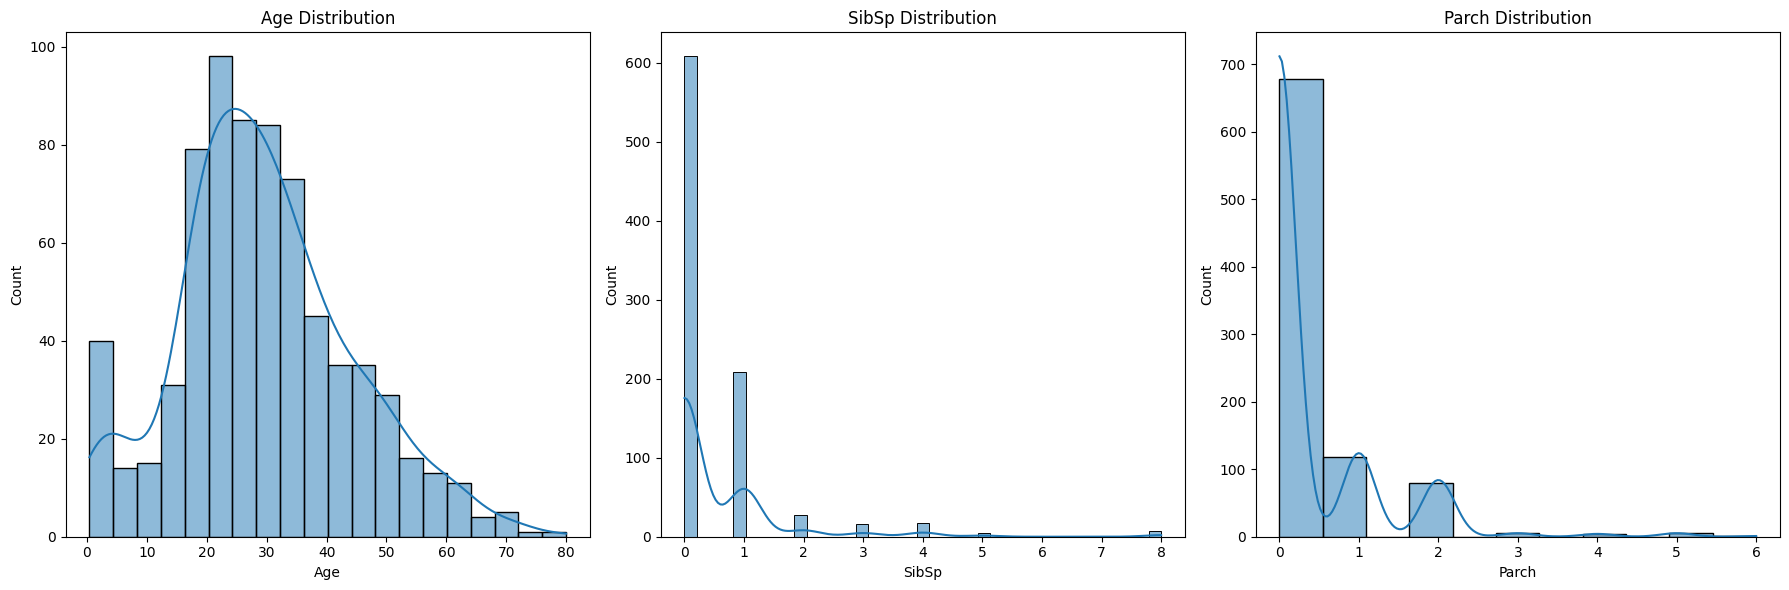

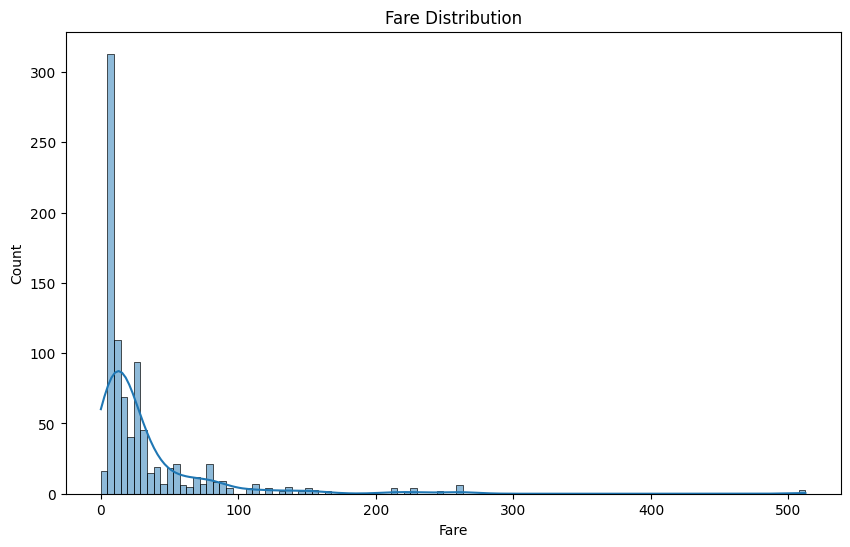

In [9]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Age Distribution
sns.histplot(data=df_train, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# SibSp Distribution
sns.histplot(data=df_train, x='SibSp', kde=True, ax=axes[1])
axes[1].set_title('SibSp Distribution')

# Parch Distribution
sns.histplot(data=df_train, x='Parch', kde=True, ax=axes[2])
axes[2].set_title('Parch Distribution')

plt.tight_layout()
plt.show()

# Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Fare', kde=True)
plt.title('Fare Distribution')
plt.show()

* Age Distribution: Likely to be normally distributed with some outliers towards older ages.

* SibSp Distribution: Likely to have a skewed distribution with a majority of values being 0 (indicating no siblings/spouses or parents/children onboard).

* Parch Distribution: Likely to have a skewed distribution with a majority of values being 0 (indicating no siblings/spouses or parents/children onboard).

* Fare Distribution: Likely to have a right-skewed distribution with some high values indicating expensive tickets.

# Which independent variables have missing data? How much?

In [10]:

def missing_data_summary(df):
    # Find the count of missing values in each column
    missing_count = df.isnull().sum()

    # Find the total number of rows
    total_rows = len(df)

    # Find the percentage of missing values in each column
    missing_percentage = (missing_count / total_rows) * 100

    # Combine count and percentage into a DataFrame
    missing_data_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})

    return missing_data_summary

In [11]:
missing_data_summary(df_train)

,Missing Count,Missing Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [12]:
missing_data_summary(df_test)

,Missing Count,Missing Percentage
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


 # Do the training and test sets have the same data?

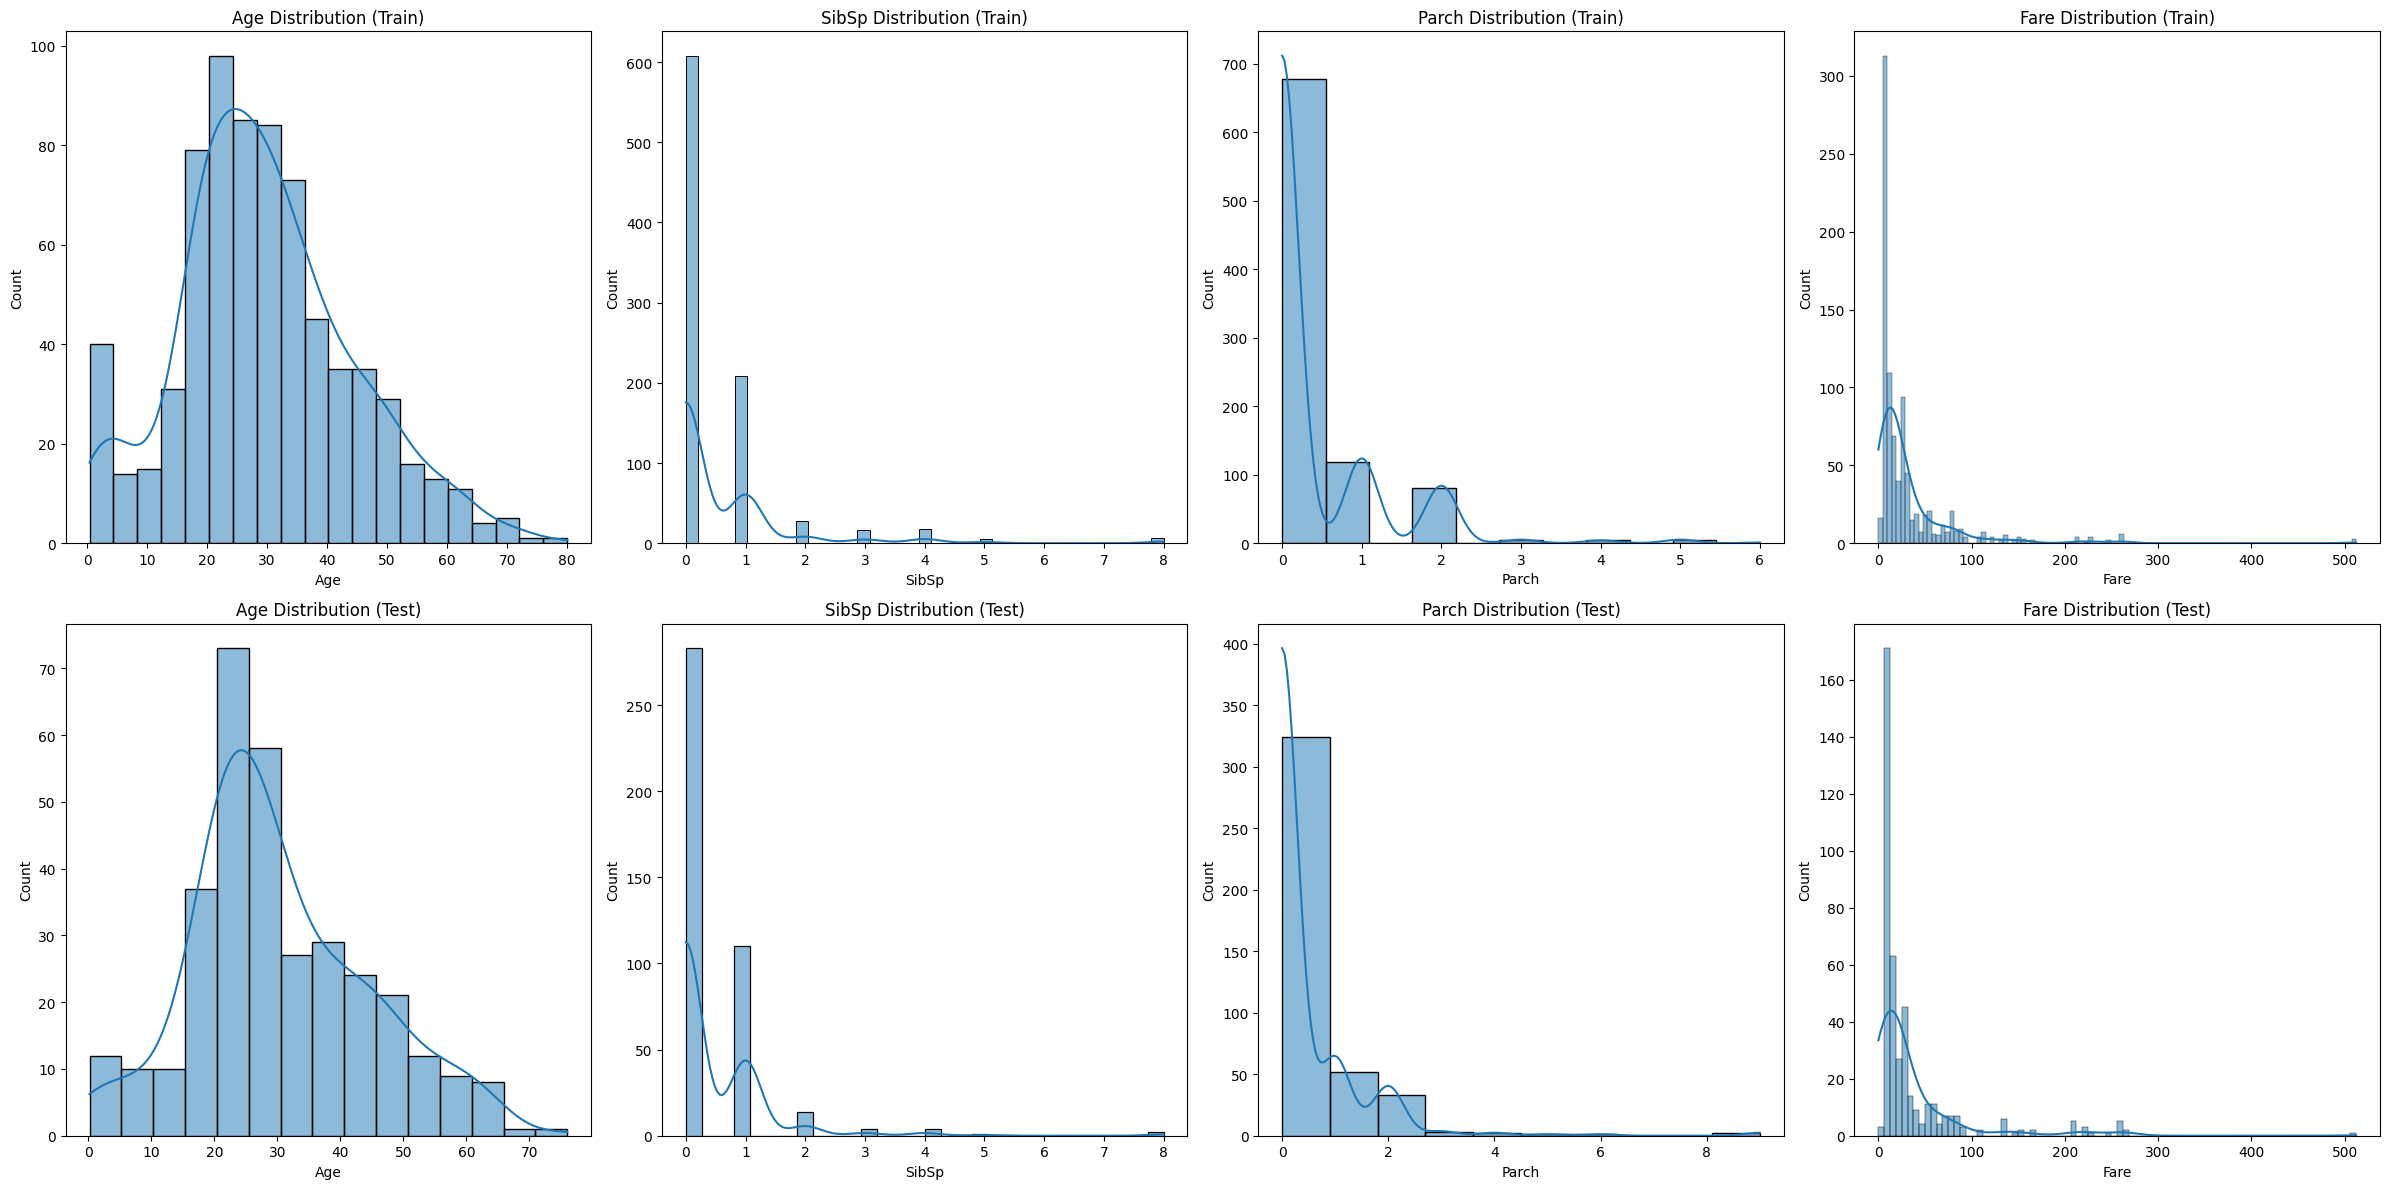

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Age Distribution for df_train
sns.histplot(data=df_train, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Train)')

# SibSp Distribution for df_train
sns.histplot(data=df_train, x='SibSp', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('SibSp Distribution (Train)')

# Parch Distribution for df_train
sns.histplot(data=df_train, x='Parch', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Parch Distribution (Train)')

# Fare Distribution for df_train
sns.histplot(data=df_train, x='Fare', kde=True, ax=axes[0, 3])
axes[0, 3].set_title('Fare Distribution (Train)')

# Age Distribution for df_test
sns.histplot(data=df_test, x='Age', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution (Test)')

# SibSp Distribution for df_test
sns.histplot(data=df_test, x='SibSp', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('SibSp Distribution (Test)')

# Parch Distribution for df_test
sns.histplot(data=df_test, x='Parch', kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Parch Distribution (Test)')

# Fare Distribution for df_test
sns.histplot(data=df_test, x='Fare', kde=True, ax=axes[1, 3])
axes[1, 3].set_title('Fare Distribution (Test)')

plt.tight_layout()
plt.show()


Yes, train and test has similar data, where test does not contain target feature

#In the predictor variables independent of all the other predictor variables?

<ipython-input-14-9f14e4b23260>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


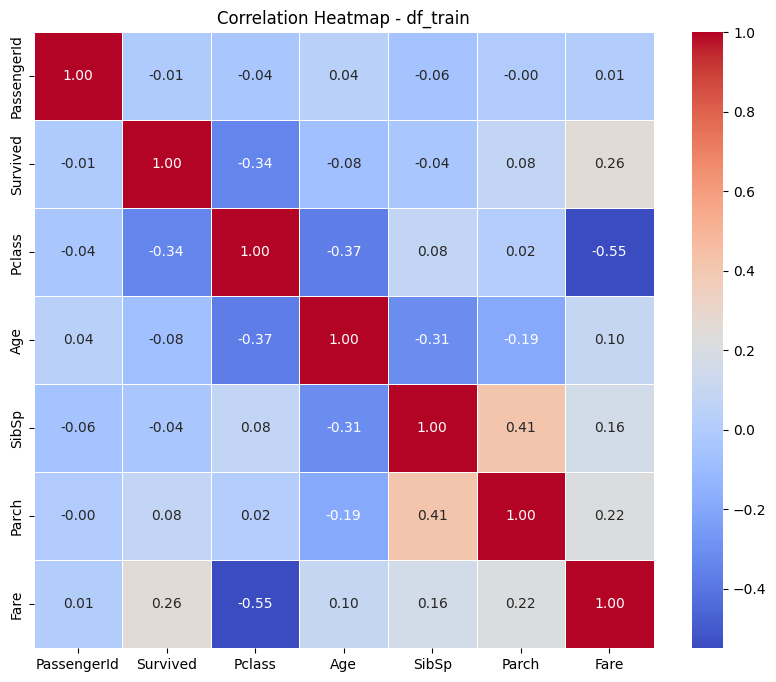

In [14]:
correlation_matrix = df_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap - df_train')
plt.show()

#Are there missing values?

In [15]:
#checking for missing data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age', 'Cabin', 'Embarked' has missing values from train data



In [16]:
#checking for missing data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

'Age', 'Cabin', 'Fare' has missing values from test data

In [17]:
def med_impute_nan(df_train):

    med_impute_df_train = df_train.copy()  # Copy of dataframe for imputation
    med_impute_df_train["Age"] = med_impute_df_train["Age"].fillna(med_impute_df_train["Age"].median())
    return med_impute_df_train

In [18]:
med_impute_df_train = med_impute_nan(df_train)
med_impute_df_test = med_impute_nan(df_test)

In [19]:
med_impute_df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
med_impute_df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
med_impute_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# checking standard deviation
print(df_train['Age'].std())
print(med_impute_df_train['Age'].std())

14.526497332334042
13.019696550973201


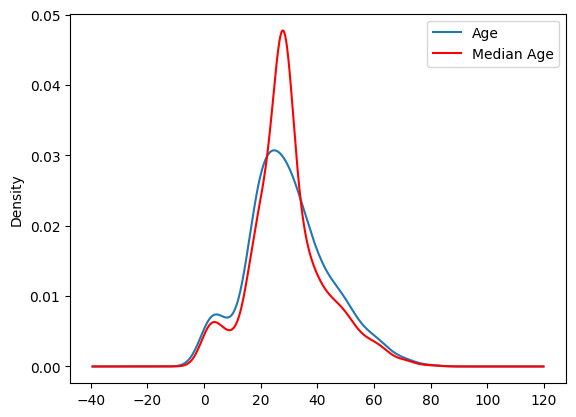

In [23]:
# plotting the variance difference
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['Age'].plot(kind='kde', ax=ax)
med_impute_df_train['Age'].plot(kind='kde', label='Median Age', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
def rand_impute_nan(df_train):

    rand_impute_df_train = df_train.copy()  # Copy of dataframe for imputation
    # It will have the random sample to fill the nan
    random_sample = rand_impute_df_train["Age"].dropna().sample(rand_impute_df_train["Age"].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index = rand_impute_df_train[rand_impute_df_train["Age"].isnull()].index
    rand_impute_df_train.loc[rand_impute_df_train["Age"].isnull(),"Age"] = random_sample
    return rand_impute_df_train

In [25]:
rand_impute_df_train = rand_impute_nan(df_train)
rand_impute_df_test = rand_impute_nan(df_test)

In [26]:
rand_impute_df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
rand_impute_df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
rand_impute_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# checking standard deviation
print(df_train['Age'].std())
print(rand_impute_df_train['Age'].std())

14.526497332334042
14.56365408956869


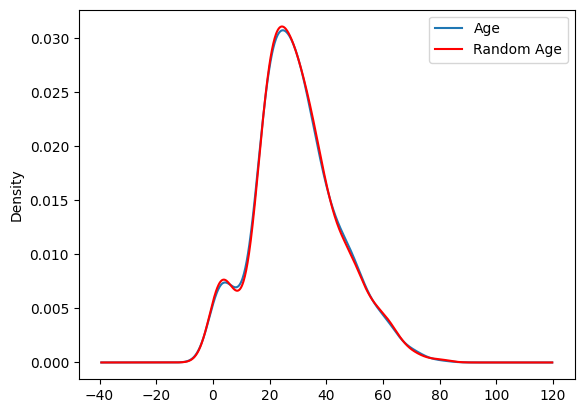

In [30]:
# plotting the variance difference
fig = plt.figure()
ax = fig.add_subplot(111)
df_train['Age'].plot(kind='kde', ax=ax)
rand_impute_df_train['Age'].plot(kind='kde', label='Random Age', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [31]:
df2 = rand_impute_df_train
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df2.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
emabark = df2['Embarked'].dropna()

In [34]:
df2[df2['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [35]:
df2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [36]:
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
df2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [38]:
df2['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [39]:
df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace=True)

In [40]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [41]:
df3 = rand_impute_df_test
df3.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
int(df3['Fare'].mean())

35

In [43]:
df3['Fare'] = df3['Fare'].fillna(np.mean(df2['Fare']))
df3.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [44]:
df3['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [45]:
df3['Cabin'].mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [46]:
df3['Cabin'].fillna(df3['Cabin'].mode()[0], inplace=True)
df3.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [113]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [48]:
df2['Sex'] = df2['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

def fun(x):

if x == 'male': return 1
else: return 0

In [49]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


In [114]:
df3['Sex'] = df3['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df3['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [115]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [50]:
df2.drop(columns=['Name'], inplace=True)

In [51]:
df2.drop(columns=['Ticket'], inplace=True)

In [52]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,B96 B98,S
1,2,1,1,0,38.0,1,0,71.2833,C85,C
2,3,1,3,0,26.0,0,0,7.9250,B96 B98,S
3,4,1,1,0,35.0,1,0,53.1000,C123,S
4,5,0,3,1,35.0,0,0,8.0500,B96 B98,S


In [116]:
df3.drop(columns=['Name', 'Ticket'], inplace=True)

In [117]:
df3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,B57 B59 B63 B66,Q
1,893,3,0,47.0,1,0,7.0000,B57 B59 B63 B66,S
2,894,2,1,62.0,0,0,9.6875,B57 B59 B63 B66,Q
3,895,3,1,27.0,0,0,8.6625,B57 B59 B63 B66,S
4,896,3,0,22.0,1,1,12.2875,B57 B59 B63 B66,S


In [53]:
print(df2["Embarked"].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [54]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df2[col] = le.fit_transform(df2[col])
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,B96 B98,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,B96 B98,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,B96 B98,2


In [118]:
print(df3["Embarked"].value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [119]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df3[col] = le.fit_transform(df3[col])
df3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,B57 B59 B63 B66,1
1,893,3,0,47.0,1,0,7.0000,B57 B59 B63 B66,2
2,894,2,1,62.0,0,0,9.6875,B57 B59 B63 B66,1
3,895,3,1,27.0,0,0,8.6625,B57 B59 B63 B66,2
4,896,3,0,22.0,1,1,12.2875,B57 B59 B63 B66,2


In [57]:
df2 = df2.drop(columns=['Cabin'], axis=1)
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [120]:
df3 = df3.drop(columns=['Cabin'], axis=1)
df3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


# Which independent variables are useful to predict a target (dependent variable)?

In [58]:
# Correlation analysis
correlation_matrix = df2.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with target (Survived):\n", correlation_with_target)

Correlation with target (Survived):
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.044463
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


* In this case, 'Sex', 'Pclass', and 'Embarked' have the highest absolute correlation values with 'Survived', suggesting they may be useful for prediction

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Define independent variables (features) and the target variable
X = df2.drop('Survived', axis=1)
y = df2['Survived']

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit RandomForestClassifier
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:\n", feature_importances)


Feature importances from Random Forest:
 Sex            0.248473
Fare           0.201865
PassengerId    0.189011
Age            0.176636
Pclass         0.079431
SibSp          0.040337
Parch          0.034736
Embarked       0.029512
dtype: float64


* In this case, 'Sex', 'Fare', 'PassengerId', and 'Age' have higher feature importance values, suggesting they are more influential in predicting survival.

In [65]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k='all')

# Fit selector to the data
selector.fit(X, y)

# Get feature scores
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("Univariate feature scores using ANOVA F-test:\n", feature_scores)


Univariate feature scores using ANOVA F-test:
 Sex            372.405724
Pclass         115.031272
Fare            63.030764
Embarked        25.717286
Parch            5.963464
Age              1.760985
SibSp            1.110572
PassengerId      0.022285
dtype: float64


* 'Sex', 'Pclass', 'Fare', and 'Embarked' have higher F-test scores, suggesting they are more relevant in predicting survival.

# Which predictor variables are the most important?

* Based on the outputs from the three methods, the following predictor variables appear to be most important:

1. 'Sex'
2. 'Pclass'
3. 'Fare'
4. 'Embarked'

#Do the ranges of the predictor variables make sense?
#What are the distributions of the predictor variables?

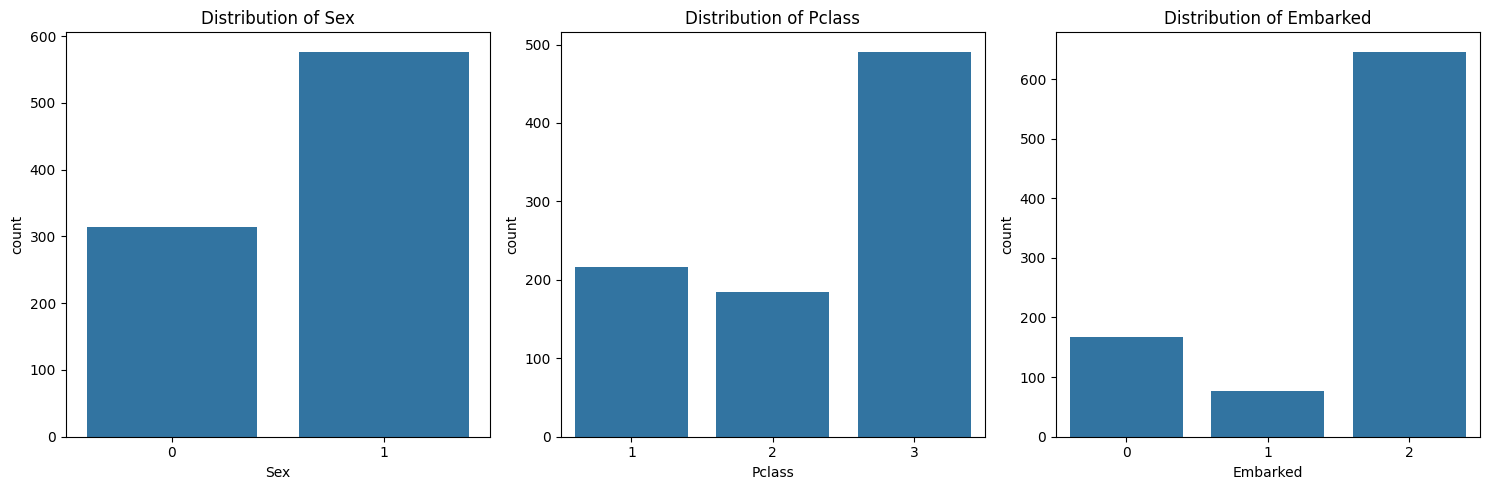

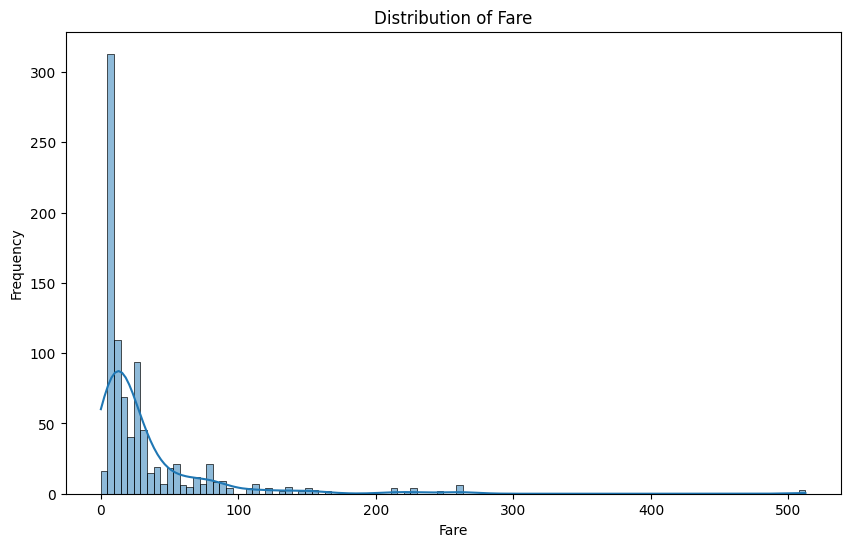

In [72]:
# Plotting categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='Sex', data=df2, ax=axes[0])
axes[0].set_title('Distribution of Sex')

sns.countplot(x='Pclass', data=df2, ax=axes[1])
axes[1].set_title('Distribution of Pclass')

sns.countplot(x='Embarked', data=df2, ax=axes[2])
axes[2].set_title('Distribution of Embarked')

plt.tight_layout()
plt.show()

# Plotting continuous variable 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


<Axes: >

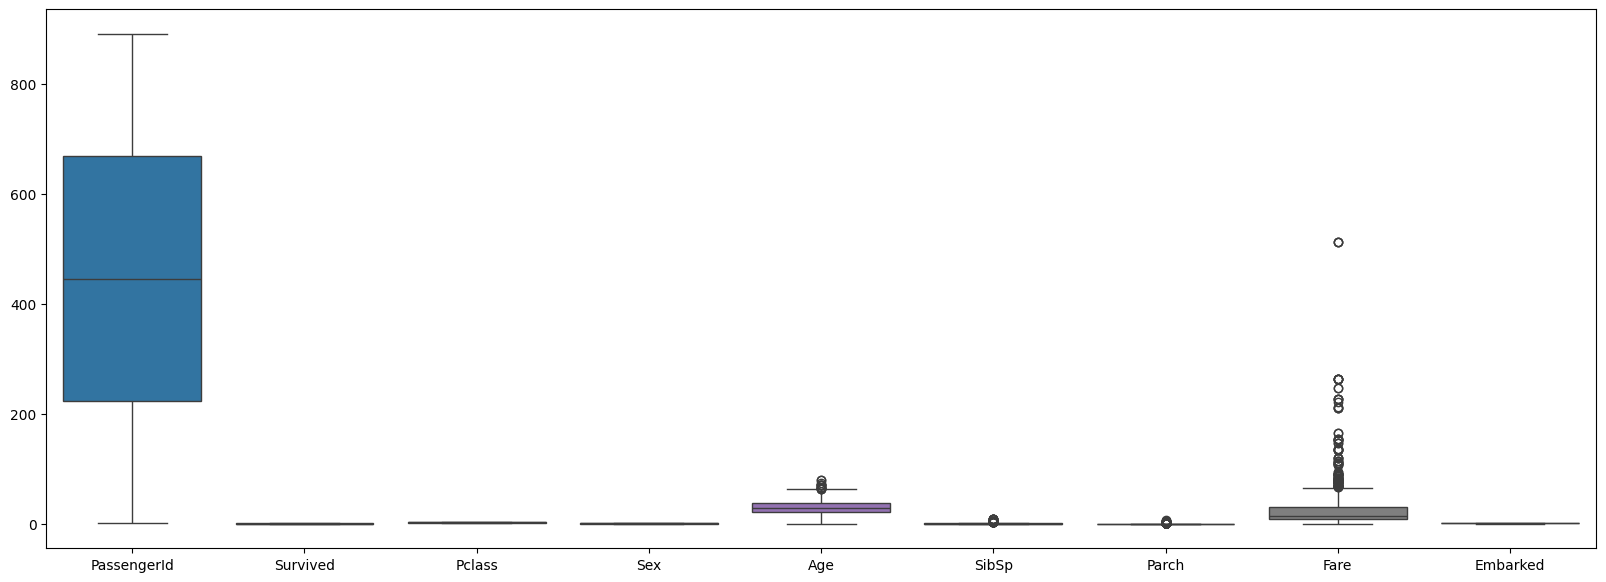

In [88]:
plt.figure(figsize=(20, 7))
sns.boxplot(df2)

#Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [74]:
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

def remove_outliers(df):  # Function to Remove All outliers
    df_removed_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df_removed_outliers


def feature_scaling(df):  # Function to scale all the features
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_df = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    return scaled_df

In [89]:
# Feature Scaling Training Data with Outliers
df2_scaled = feature_scaling(df2)

# Removing outliers from training data
df2_scaled_nooutlier = remove_outliers(df2_scaled)


In [77]:
df2_scaled_nooutlier

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.001124,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,0.002247,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.003371,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,0.004494,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
887,0.996629,1.0,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
888,0.997753,0.0,1.0,0.0,0.183212,0.125,0.333333,0.045771,1.0
889,0.998876,1.0,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


In [122]:
# Feature Scaling Testing Data
df3_scaled = feature_scaling(df3)

# Removing outliers from testing data
df3_scaled_nooutlier = remove_outliers(df3_scaled)

In [123]:
df3_scaled_nooutlier

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5
1,0.002398,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0
2,0.004796,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5
3,0.007194,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0
4,0.009592,1.0,0.0,0.287881,0.125,0.111111,0.023984,1.0
...,...,...,...,...,...,...,...,...
413,0.990408,1.0,1.0,0.327443,0.000,0.000000,0.015713,1.0
414,0.992806,0.0,0.0,0.512066,0.000,0.000000,0.212559,0.0
415,0.995204,1.0,1.0,0.505473,0.000,0.000000,0.014151,1.0
416,0.997602,1.0,1.0,0.380193,0.000,0.000000,0.015713,1.0


In [78]:
# Correlation analysis
correlation_matrix = df2_scaled_nooutlier.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with target (Survived):\n", correlation_with_target)

Correlation with target (Survived):
 Survived       1.000000
Fare           0.327759
Parch          0.201746
SibSp          0.096271
PassengerId   -0.015787
Age           -0.074233
Embarked      -0.148092
Pclass        -0.314280
Sex           -0.558236
Name: Survived, dtype: float64


In [82]:
df2_scaled_nooutlier.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,0.499009,0.387136,0.654126,0.658981,0.370604,0.043538,0.042476,0.050524,0.769417
std,0.286643,0.487391,0.413805,0.474340,0.175995,0.077338,0.094123,0.058187,0.394663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252528,0.000000,0.500000,0.000000,0.258608,0.000000,0.000000,0.015412,0.500000
50%,0.500562,0.000000,1.000000,1.000000,0.346569,0.000000,0.000000,0.025374,1.000000
75%,0.741854,1.000000,1.000000,1.000000,0.472229,0.125000,0.000000,0.053052,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.886906,0.375000,0.333333,0.321798,1.000000


In [84]:
df2_scaled.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.647587,0.367936,0.065376,0.063599,0.062858,0.768238
std,0.289162,0.486592,0.418036,0.477990,0.183006,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.000000,0.258608,0.000000,0.000000,0.015440,0.500000
50%,0.500000,0.000000,1.000000,1.000000,0.346569,0.000000,0.000000,0.028213,1.000000
75%,0.750000,1.000000,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


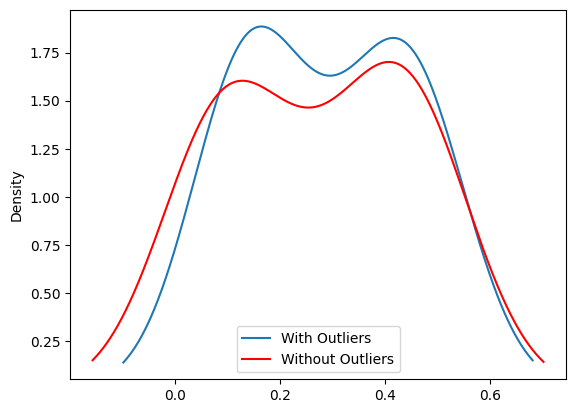

In [99]:
# plotting the std difference
fig = plt.figure()
ax = fig.add_subplot(111)
df2_scaled.std().plot(kind='kde', label='With Outliers', ax=ax)
df2_scaled_nooutlier.std().plot(kind='kde', label='Without Outliers', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [101]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Function to randomly remove a percentage of data
def remove_percentage_of_data(df2, percentage):
    num_rows_to_remove = int(len(df2) * percentage / 100)
    indices_to_remove = np.random.choice(df2.index, num_rows_to_remove, replace=False)
    df2_removed = df2.drop(indices_to_remove)
    return df2_removed, indices_to_remove



In [107]:
# Here the imputation is being carried out
# Function to impute missing values using various methods

def impute_missing_values(df2, method='mean'):
    imputer = None
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'knn':
        imputer = KNNImputer()
    else:
        raise ValueError("Invalid imputation method. Choose from 'mean', 'median', or 'knn'.")

    df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
    return df2_imputed

In [108]:
# Function to assess recovery of missing values
def assess_recovery(original_df2, imputed_df2, indices_removed):
    # Calculate residuals for numeric data
    numeric_columns = original_df2.select_dtypes(include=np.number).columns

    residuals = original_df2[numeric_columns] - imputed_df2[numeric_columns]

    # Calculate percentage error on residuals
    percentage_error = (residuals.abs() / original_df2[numeric_columns]).mean() * 100

    # Calculate bias and variance of the error
    bias = residuals.mean()
    variance = residuals.var()

    return percentage_error, bias, variance


In [109]:
# Define the percentages of data to remove
percentages_to_remove = [1, 5, 10]

# Define imputation methods
imputation_methods = ['mean', 'median', 'knn']

# Results dictionary to store assessment results
results = {}

In [110]:
# Iterate over each percentage to remove
for percentage in percentages_to_remove:
    # Remove percentage of data
    df2_removed, indices_removed = remove_percentage_of_data(df2, percentage)

    # Iterate over each imputation method
    for method in imputation_methods:
        # Impute missing values
        df2_imputed = impute_missing_values(df2_removed, method)

        # Assess recovery of missing values
        percentage_error, bias, variance = assess_recovery(df2, df2_imputed, indices_removed)

        # Store results
        results[(percentage, method)] = {'Percentage Error': percentage_error, 'Bias': bias, 'Variance': variance}


In [112]:
# Print results
for key, value in results.items():
    print(f"Percentage of Data Removed: {key[0]}%, Imputation Method: {key[1]}")
    print("Percentage Error on Residuals:")
    print(value['Percentage Error'])
    print("Bias of Error:")
    print(value['Bias'])
    print("Variance of Error:")
    print(value['Variance'])
    print("-------")
    print()


Percentage of Data Removed: 1%, Imputation Method: mean
Percentage Error on Residuals:
PassengerId      0.639791
Survived              inf
Pclass          45.186863
Sex                   inf
Age            153.539820
SibSp                 inf
Parch                 inf
Fare                  inf
Embarked              inf
dtype: float64
Bias of Error:
PassengerId   -3.370328
Survived       0.001133
Pclass         0.003398
Sex            0.000000
Age            0.047565
SibSp          0.005663
Parch         -0.004530
Fare          -0.019054
Embarked       0.002265
dtype: float64
Variance of Error:
PassengerId       6.335490
Survived          0.402493
Pclass            1.184796
Sex               0.401361
Age             356.055086
SibSp             2.232394
Parch             1.020388
Fare           4464.314789
Embarked          1.036276
dtype: float64
-------

Percentage of Data Removed: 1%, Imputation Method: median
Percentage Error on Residuals:
PassengerId      0.639791
Survived         